#  Notebook 5: Introduction to  Logistic Regression, Pandas, and TensorFlow #
Yi Ming Chang <br>
B00751897 <br>
Feb 2nd, 2021

# The solutions below has been scaled by sklearn, the TensorFlow code is at the bottom

In [2]:
# Importing the SUSY Data set
import sys, os
import pandas as pd

import numpy as np
import warnings
#Commnet the next line on to turn off warnings
#warnings.filterwarnings('ignore')


seed=12
np.random.seed(seed)
import tensorflow as tf
# suppress tflow compilation warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

tf.random.set_seed(seed)

# Download the SUSY.csv (about 2GB) from UCI ML archive and save it in the same directory as this jupyter notebook
# See: https://archive.ics.uci.edu/ml/machine-learning-databases/00279/
#filename="SUSY.csv"
filename=os.path.expanduser('~')+'/ML_review/SUSY_data/SUSY.csv' 



columns=["signal", "lepton 1 pT", "lepton 1 eta", "lepton 1 phi", "lepton 2 pT", "lepton 2 eta", 
         "lepton 2 phi", "missing energy magnitude", "missing energy phi", "MET_rel", 
         "axial MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos(theta_r1)"]

# Load 1,500,000 rows as train data, 50,000 as test data
df_train=pd.read_csv(filename,names=columns,nrows=1500000,engine='python')
df_test=pd.read_csv(filename,names=columns,nrows=50000, skiprows=1500000,engine='python')

In [3]:
df_train

,signal,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499995,1.0,0.850400,-0.405403,0.887922,1.321459,-1.818522,-0.830087,0.362322,0.087139,0.540693,0.474668,1.194133,0.606812,0.450940,0.000000,1.202085,0.329779,1.434140,0.004427
1499996,0.0,0.541110,-0.169050,1.501685,0.631742,-0.497810,-0.028992,0.372428,-1.056364,0.233822,0.080112,0.488920,0.500963,0.909253,0.612218,0.499604,0.500684,1.128392,0.075520
1499997,1.0,1.432212,-1.460587,0.438658,2.195239,0.002898,-1.384038,0.455017,1.151974,0.654477,0.750685,2.006761,0.847940,0.374960,0.000000,2.011105,0.242422,1.391511,0.001998
1499998,0.0,0.712634,-0.162646,0.508826,0.755460,-1.018165,-1.614509,0.625585,-0.731152,0.939081,-0.297304,0.688081,0.801368,1.033500,1.177825,0.712970,0.925136,1.341622,0.188397


In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
import tensorflow.compat.v1 as tf
from sklearn.preprocessing import scale


tf.disable_v2_behavior()

#import ml_style as style #optional styling sheet
#mpl.rcParams.update(style.style) #optional styling sheet

def getTrainData(nVar):
    designMatrix = df_train.iloc[:,1:nVar+1].values
    #now the signal
    labels = df_train['signal'].values # labels (0 or 1)
    return (scale(designMatrix),labels)

def getTestData(nVar):
    designMatrix = df_test.iloc[:,1:nVar+1].values
    #now the signal
    labels = df_test['signal'].values
    return (scale(designMatrix),labels)

# define
def build_roc_curve(probs, signal_bit, threshes):
    # Convert things to a pandas series to build a DataFrame
    # which will make ROC curve logic easier to express
    signal_probs = pd.Series(probs[:,1])
    signal_true = pd.Series(signal_bit)
    signal_df = pd.DataFrame(signal_probs, columns=['sig_prob'])
    signal_df.loc[:,'sig_true'] = signal_true
    Acceptance = []
    Rejection = []
    for thresh in threshes:
        # define acceptance
        signal_df.loc[:,'accept'] = signal_df['sig_prob'] > thresh
        # sum over data frame with slicing conditions
        nSigCor = len(signal_df[(signal_df['accept']) & (signal_df['sig_true']==1.)])
        nSig = len(signal_df[signal_df['sig_true']==1.])
        nBkgCor = len(signal_df[ (signal_df['sig_true']==0.) & (~signal_df['accept'])])
        nBkg = len(signal_df[signal_df['sig_true']==0.])
        Acceptance.append(nSigCor/nSig) # False positive rate
        Rejection.append(nBkgCor/nBkg) # True positive rate

    return Acceptance, Rejection
    
# let's define this as a function so we can call it easily
def runTensorFlowRegression(nVar,alpha):

    #make data array placeholder for just first 8 simple features
    x = tf.compat.v1.placeholder(tf.float32,[None,nVar])
    #make weights and bias
    W = tf.Variable(tf.zeros([nVar,2])) #we will make y 'onehot' 0 bit is bkg, 1 bit is signal
    b = tf.Variable(tf.zeros([2]))

    
    #make 'answer variable'
    y = tf.nn.softmax(tf.matmul(x, W) + b)
    #placeholder for correct answer
    y_ = tf.compat.v1.placeholder(tf.float32, [None, 2])
    #cross entropy with L2 regularizer
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y,labels=y_)+alpha*tf.nn.l2_loss(W))
    
    #define training step
    train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
    #initialize variables 
    init = tf.global_variables_initializer()
    #setup session
    sess = tf.Session()
    sess.run(init)

    #ok now everything is setup for tensorflow, but we need the data in a useful form
    #first let's get the variables
    Var_train, Sig_train_bit1 = getTrainData(nVar)
    #now the signal
    Sig_train_bit0 = Sig_train_bit1.copy()
    Sig_train_bit0 = 1 - Sig_train_bit0
    Sig_train = np.column_stack((Sig_train_bit0,Sig_train_bit1))
    
    ######## ------- TRAINING ----------############
    #Now perform minibatch gradient descent with minibatches of size 100:
    n_data = len(Sig_train_bit1)
    minibatch_size = 1000
    n_minibatch = n_data//minibatch_size
    print('\t Training with %i minibatches, dataset size is %i'%(n_minibatch,n_data))
    for i in range(0, n_minibatch):
        sys.stdout.write("%.3f %% completed \r"%(100*i/n_minibatch))
        sys.stdout.flush()
        start = i*minibatch_size
        end = (i+1)*minibatch_size-1
        
        batch_x = Var_train[start:end]
        batch_y = Sig_train[start:end]
        sess.run(train_step, feed_dict={x: batch_x, y_: batch_y})
    
    
    # Accuracy function:
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    ######## ------- TESTING ----------############
    # Setup test data
    Var_test = df_test.iloc[:,1:nVar+1].values
    
    # Now the signal
    Sig_test_bit1 = df_test['signal'].values
    
    Sig_test_bit0 = Sig_test_bit1.copy()
    Sig_test_bit0 = 1 - Sig_test_bit0
    Sig_test = np.column_stack((Sig_test_bit0,Sig_test_bit1))
    print("\t Accuracy for alpha %.1E : %.3f" %(alpha,sess.run(accuracy, feed_dict={x: Var_test, y_: Sig_test})))
    
    # Get the weights
    weights = W.eval(session=sess)
    # Get probabilities assigned (i.e. evaluate y on test data)
    probs = y.eval(feed_dict = {x: Var_test}, session = sess)
    # now let's get the signal efficiency and background rejection on the test data
    print('\t Computing ROC curve ...')
    # build ROC curve by scanning over thresholds of probability of being
    # a background event and calculating signal efficiency/background rejection
    # at each threshold
    threshes = np.arange(0,1,0.01)
    Acceptance, Rejection = build_roc_curve(probs, Sig_test_bit1, threshes)

    return (probs,Acceptance,Rejection)

Training for alpha = 1.00E-10
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 1.0E-10 : 0.457
	 Computing ROC curve ...
Training for alpha = 6.58E-10
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 6.6E-10 : 0.457
	 Computing ROC curve ...
Training for alpha = 4.33E-09
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 4.3E-09 : 0.457
	 Computing ROC curve ...
Training for alpha = 2.85E-08
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 2.8E-08 : 0.457
	 Computing ROC curve ...
Training for alpha = 1.87E-07
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 1.9E-07 : 0.457
	 Computing ROC curve ...
Training for alpha = 1.23E-06
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 1.2E-06 : 0.457
	 Computing ROC curve ...
Training for alpha = 8.11E-06
	 Training with 1500 minibatches, dataset size is 1500000
	 Accu

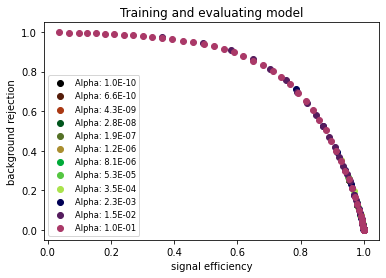

In [129]:
# We sweep the L2 regularizer strength (alpha) over 10 decades
alphas = np.logspace(-10,-1,12)
fig = plt.figure()
ax = fig.add_subplot(111)
it=0
for alpha in alphas:
    print("Training for alpha = %.2E"%alpha)
    c1 = 1.*( float(it) % 3.)/3.0
    c2 = 1.*( float(it) % 9.)/9.0
    c3 = 1.*( float(it) % 27.)/27.0
    probsSimple,accep,rej = runTensorFlowRegression(8,alpha)
    ax.scatter(accep,rej,c=[[c1,c2,c3]],label='Alpha: %.1E' %alpha)
    it+=1
    
ax.set_xlabel('signal efficiency')
ax.set_ylabel('background rejection')
plt.legend(loc='lower left', fontsize = 'small')
plt.title('Training and evaluating model')
plt.show()

	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 1.0E-05 : 0.457
	 Computing ROC curve ...


Text(0.5, 1.0, 'train the model for 8 variables and alpha=.00001')

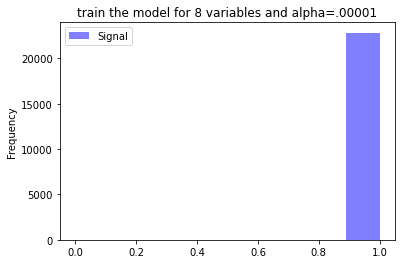

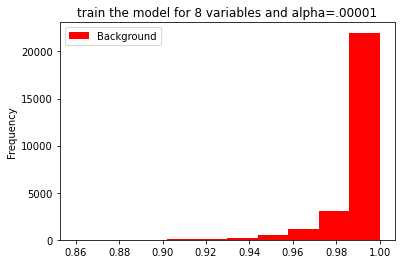

In [130]:
# now let's investigate how mixed the events are
probsSimple,accep,rej = runTensorFlowRegression(8,.00001) # train the model for 8 variables and alpha=.00001
Signal = df_test['signal'].values

df_test_acc = pd.DataFrame({'PROB':probsSimple[:,1]})
df_test_acc['SIG']=Signal
df_test_acc_sig = df_test_acc.query('SIG==1')
df_test_acc_bkg = df_test_acc.query('SIG==0')
df_test_acc_sig.plot(kind='hist',y='PROB',color='blue',alpha=0.5,bins=np.linspace(0,1,10),label='Signal')
plt.title('train the model for 8 variables and alpha=.00001')
df_test_acc_bkg.plot(kind='hist',y='PROB',color='red',label='Background')
plt.title('train the model for 8 variables and alpha=.00001')

	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 1.0E-10 : 0.457
	 Computing ROC curve ...
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 1.3E-09 : 0.457
	 Computing ROC curve ...
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 1.6E-08 : 0.457
	 Computing ROC curve ...
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 2.0E-07 : 0.457
	 Computing ROC curve ...
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 2.5E-06 : 0.457
	 Computing ROC curve ...
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 3.2E-05 : 0.457
	 Computing ROC curve ...
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 4.0E-04 : 0.457
	 Computing ROC curve ...
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 5.0E-03 : 0.457
	 Computing ROC curve ...
	 Training with 1500 minibatches

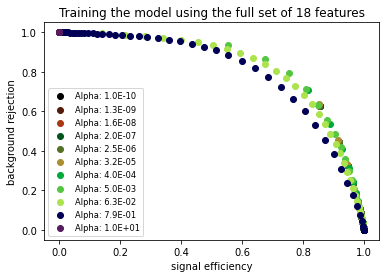

In [131]:
alphas = np.logspace(-10,1,11)
fig = plt.figure()
ax = fig.add_subplot(111)
it=0
for alpha in alphas:
    c1 = 1.*( float(it) % 3.)/3.0
    c2 = 1.*( float(it) % 9.)/9.0
    c3 = 1.*( float(it) % 27.)/27.0
    probsSimple,accep,rej = runTensorFlowRegression(18,alpha)
    ax.scatter(accep,rej,c=[[c1,c2,c3]],label='Alpha: %.1E' %alpha)
    it+=1
    
ax.set_xlabel('signal efficiency')
ax.set_ylabel('background rejection')
plt.title('Training the model using the full set of 18 features')
plt.legend(loc='lower left', fontsize = 'small');
plt.show()
def runSciKitRegressionL2(nVar, alpha):
    X_train, y_train = getTrainData(nVar)
    X_test, y_test = getTestData(nVar)
    clf = SGDClassifier(loss="log", penalty="l2",alpha=alpha,max_iter=5,tol=None)
    clf.fit(X_train,y_train.ravel())
    predictions = clf.predict(X_test)
    print('Accuracy on test data with alpha %.2E : %.3f' %(alpha,clf.score(X_test,y_test)) )
    probs = clf.predict_proba(X_test)

    #get signal acceptance and background rejection
    thresholds = np.arange(0,1,.01)
    Acceptance, Rejection = build_roc_curve(probs, y_test, thresholds)
    return (probs, Acceptance, Rejection)


def runSciKitRegressionL1(nVar,alpha):
    X_train, y_train = getTrainData(nVar)
    X_test, y_test = getTestData(nVar)
    clf = SGDClassifier(loss="log", penalty="l1",alpha=alpha,max_iter=5,tol=None)
    clf.fit(X_train,y_train.ravel())
    predictions = clf.predict(X_test)
    print('Accuracy on test data with alpha %.2E : %.3f' %(alpha,clf.score(X_test,y_test)) )
    probs = clf.predict_proba(X_test)

    #get signal acceptance and background rejection
    thresholds = np.arange(0,1,.01)
    Acceptance, Rejection = build_roc_curve(probs, y_test, thresholds)
    return (probs,Acceptance,Rejection)

Accuracy on test data with alpha 1.00E-10 : 0.590
Accuracy on test data with alpha 1.26E-09 : 0.679
Accuracy on test data with alpha 1.58E-08 : 0.708
Accuracy on test data with alpha 2.00E-07 : 0.703
Accuracy on test data with alpha 2.51E-06 : 0.768
Accuracy on test data with alpha 3.16E-05 : 0.767
Accuracy on test data with alpha 3.98E-04 : 0.769
Accuracy on test data with alpha 5.01E-03 : 0.768
Accuracy on test data with alpha 6.31E-02 : 0.755
Accuracy on test data with alpha 7.94E-01 : 0.543
Accuracy on test data with alpha 1.00E+01 : 0.543


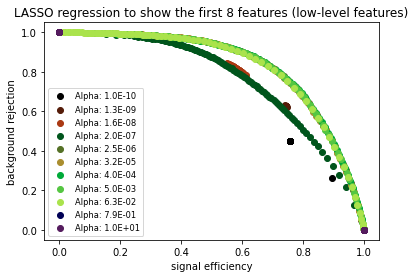

Accuracy on test data with alpha 1.00E-10 : 0.657
Accuracy on test data with alpha 1.26E-09 : 0.600
Accuracy on test data with alpha 1.58E-08 : 0.741
Accuracy on test data with alpha 2.00E-07 : 0.717
Accuracy on test data with alpha 2.51E-06 : 0.782
Accuracy on test data with alpha 3.16E-05 : 0.789
Accuracy on test data with alpha 3.98E-04 : 0.789
Accuracy on test data with alpha 5.01E-03 : 0.787
Accuracy on test data with alpha 6.31E-02 : 0.755
Accuracy on test data with alpha 7.94E-01 : 0.543
Accuracy on test data with alpha 1.00E+01 : 0.457


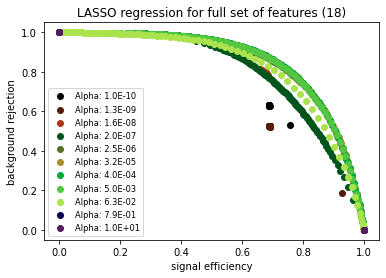

Accuracy on test data with alpha 1.00E-10 : 0.607
Accuracy on test data with alpha 1.26E-09 : 0.706
Accuracy on test data with alpha 1.58E-08 : 0.614
Accuracy on test data with alpha 2.00E-07 : 0.722
Accuracy on test data with alpha 2.51E-06 : 0.743
Accuracy on test data with alpha 3.16E-05 : 0.769
Accuracy on test data with alpha 3.98E-04 : 0.768
Accuracy on test data with alpha 5.01E-03 : 0.768
Accuracy on test data with alpha 6.31E-02 : 0.759
Accuracy on test data with alpha 7.94E-01 : 0.701
Accuracy on test data with alpha 1.00E+01 : 0.457


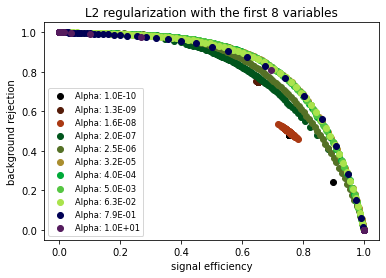

Accuracy on test data with alpha 1.00E-10 : 0.639
Accuracy on test data with alpha 1.26E-09 : 0.743
Accuracy on test data with alpha 1.58E-08 : 0.575
Accuracy on test data with alpha 2.00E-07 : 0.744
Accuracy on test data with alpha 2.51E-06 : 0.766
Accuracy on test data with alpha 3.16E-05 : 0.786
Accuracy on test data with alpha 3.98E-04 : 0.789
Accuracy on test data with alpha 5.01E-03 : 0.785
Accuracy on test data with alpha 6.31E-02 : 0.768
Accuracy on test data with alpha 7.94E-01 : 0.730
Accuracy on test data with alpha 1.00E+01 : 0.552


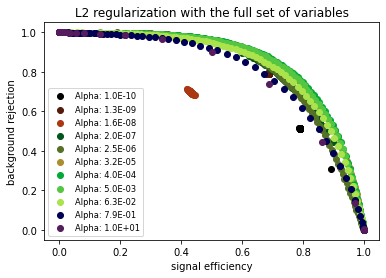

In [132]:
alphas = np.logspace(-10,1,11)
fig = plt.figure()
ax = fig.add_subplot(111)
it=0
for alpha in alphas:
    c1 = 1.*( float(it) % 3.)/3.0
    c2 = 1.*( float(it) % 9.)/9.0
    c3 = 1.*( float(it) % 27.)/27.0
    probs,accept,rej = runSciKitRegressionL1(8,alpha)
    ax.scatter(accept,rej,c=[[c1,c2,c3]],label='Alpha: %.1E' %alpha)
    it+=1

ax.set_xlabel('signal efficiency')
ax.set_ylabel('background rejection')
plt.title('LASSO regression to show the first 8 features (low-level features)')
plt.legend(loc='lower left', fontsize = 'small');
plt.show()

alphas = np.logspace(-10,1,11)
fig = plt.figure()
ax = fig.add_subplot(111)
it=0
for alpha in alphas:
    c1 = 1.*( float(it) % 3.)/3.0
    c2 = 1.*( float(it) % 9.)/9.0
    c3 = 1.*( float(it) % 27.)/27.0
    probs,accept,rej = runSciKitRegressionL1(18,alpha)
    ax.scatter(accept,rej,c=[[c1,c2,c3]],label='Alpha: %.1E' %alpha)
    it+=1

ax.set_xlabel('signal efficiency')
ax.set_ylabel('background rejection')
plt.title('LASSO regression for full set of features (18)')
plt.legend(loc='lower left', fontsize = 'small');
plt.show()
alphas = np.logspace(-10,1,11)
fig = plt.figure()
ax = fig.add_subplot(111)
it=0
for alpha in alphas:
    c1 = 1.*( float(it) % 3.)/3.0
    c2 = 1.*( float(it) % 9.)/9.0
    c3 = 1.*( float(it) % 27.)/27.0
    probs,accept,rej = runSciKitRegressionL2(8,alpha)
    ax.scatter(accept,rej,c=[[c1,c2,c3]],label='Alpha: %.1E' %alpha)
    it+=1

ax.set_xlabel('signal efficiency')
ax.set_ylabel('background rejection')
plt.title('L2 regularization with the first 8 variables')
plt.legend(loc='lower left', fontsize = 'small');
plt.show()

alphas = np.logspace(-10,1,11)
fig = plt.figure()
ax = fig.add_subplot(111)
it=0
for alpha in alphas:
    c1 = 1.*( float(it) % 3.)/3.0
    c2 = 1.*( float(it) % 9.)/9.0
    c3 = 1.*( float(it) % 27.)/27.0
    probs,accept,rej = runSciKitRegressionL2(18,alpha)
    ax.scatter(accept,rej,c=[[c1,c2,c3]],label='Alpha: %.1E' %alpha)
    it+=1

ax.set_xlabel('signal efficiency')
ax.set_ylabel('background rejection')
plt.title('L2 regularization with the full set of variables')
plt.legend(loc='lower left', fontsize = 'small');
plt.show()

Training for alpha = 1.00E-10
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 1.0E-10 : 0.457
	 Computing ROC curve ...
Training for alpha = 6.58E-10
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 6.6E-10 : 0.457
	 Computing ROC curve ...
Training for alpha = 4.33E-09
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 4.3E-09 : 0.457
	 Computing ROC curve ...
Training for alpha = 2.85E-08
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 2.8E-08 : 0.457
	 Computing ROC curve ...
Training for alpha = 1.87E-07
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 1.9E-07 : 0.457
	 Computing ROC curve ...
Training for alpha = 1.23E-06
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 1.2E-06 : 0.457
	 Computing ROC curve ...
Training for alpha = 8.11E-06
	 Training with 1500 minibatches, dataset size is 1500000
	 Accu

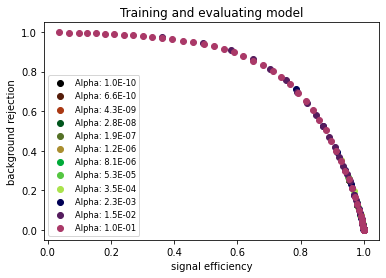

In [133]:
# We sweep the L2 regularizer strength (alpha) over 10 decades
alphas = np.logspace(-10,-1,12)
fig = plt.figure()
ax = fig.add_subplot(111)
it=0
for alpha in alphas:
    print("Training for alpha = %.2E"%alpha)
    c1 = 1.*( float(it) % 3.)/3.0
    c2 = 1.*( float(it) % 9.)/9.0
    c3 = 1.*( float(it) % 27.)/27.0
    probsSimple,accep,rej = runTensorFlowRegression(8,alpha)
    ax.scatter(accep,rej,c=[[c1,c2,c3]],label='Alpha: %.1E' %alpha)
    it+=1
    
ax.set_xlabel('signal efficiency')
ax.set_ylabel('background rejection')
plt.legend(loc='lower left', fontsize = 'small')
plt.title('Training and evaluating model')
plt.show()

	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 7.9E-01 : 0.461
	 Computing ROC curve ...
Accuracy on test data with alpha 3.98E-04 : 0.768
Accuracy on test data with alpha 3.98E-04 : 0.790


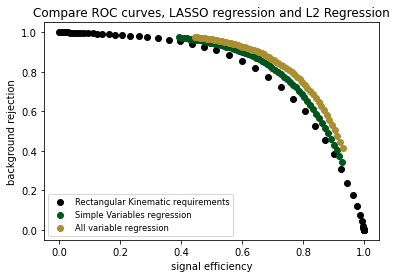

In [134]:
alphas = np.array([7.94E-01,3.98E-04,3.98E-04])
fig = plt.figure()
ax = fig.add_subplot(111)
it=0
a = 0

for alpha in alphas:
    c1 = 1.*( float(it) % 3.)/3.0
    c2 = 1.*( float(it) % 9.)/9.0
    c3 = 1.*( float(it) % 27.)/27.0
    
    if a == 0:
        probsSimple,accep,rej = runTensorFlowRegression(18,alpha)
        ax.scatter(accep,rej,c=[[c1,c2,c3]],label='Rectangular Kinematic requirements')
        a+=1
        it+=3
    elif a == 1:
        probs,accept,rej = runSciKitRegressionL1(8,alpha)
        ax.scatter(accept[20:80],rej[20:80],c=[[c1,c2,c3]],label='Simple Variables regression')
        a+=1
        it+=2
    else:
        probs1,accept1,rej1 = runSciKitRegressionL2(18,alpha)
        ax.scatter(accept1[20:80],rej1[20:80],c=[[c1,c2,c3]],label='All variable regression')

        
        
        
ax.set_xlabel('signal efficiency')
ax.set_ylabel('background rejection')
plt.legend(loc='lower left', fontsize = 'small')
plt.title('Compare ROC curves, LASSO regression and L2 Regression')
plt.show()


<b> Exercises:</b>
* Try running sci-kit learn after scaling the data - does it help the performance?
* Try coming up with some 'rectangular' requirements (i.e. a set of optimized requirements on the input variables) and see how the ROC curve for those requirements compares to using Logistic Regression
* Is there a way we could select a region training data that could potentially improve performance? Hint: Think about where the gains of ML are most valuable
* Try adding a layer of neurons in the TensorFlow code to see if you can improve performance (see also discussion in Notebook 13: __Section IX: Pytorch DNN (SUSY)__).

# Answers:

Based on the plots of LASSO and L2 regresion above, the plots certainly look better. Overall, the accuarcy of training data increase after we scale the data. Especially for L2 regularization with the 19 variables. Thus, I think it helps the performance of the dataset. 

Apparently, L2 regression has higher accuacy and have a stable local maximum compare with other methods. And the ROC curve has lesat accuacy of the data compare with logistic Regression.

Yes, there is a way we could select a region training data that could improve performace. They improve performance of the plot

ADR: Can you have a little more discussion? (maybe twice as long). I'd like to follow your discussion, rather than your code. 2/2

I have added two layers of neurons in the TensorFlow (look at the plot below). The accuracy for alpha increases as it gets larger, so it improves performace of the training data somehow.

	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 1.0E-10 : 0.457
	 Computing ROC curve ...
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 1.2E-09 : 0.457
	 Computing ROC curve ...
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 1.5E-08 : 0.457
	 Computing ROC curve ...
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 1.9E-07 : 0.457
	 Computing ROC curve ...
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 2.3E-06 : 0.457
	 Computing ROC curve ...
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 2.8E-05 : 0.457
	 Computing ROC curve ...
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 3.5E-04 : 0.457
	 Computing ROC curve ...
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 4.3E-03 : 0.457
	 Computing ROC curve ...
	 Training with 1500 minibatches

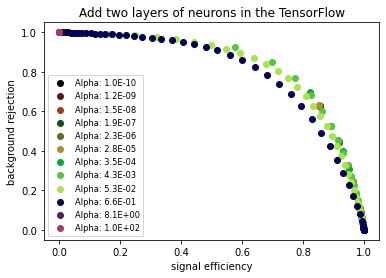

In [135]:
alphas = np.logspace(-10,2,12)
fig = plt.figure()
ax = fig.add_subplot(111)
it=0
for alpha in alphas:
    c1 = 1.*( float(it) % 3.)/3.0
    c2 = 1.*( float(it) % 9.)/9.0
    c3 = 1.*( float(it) % 27.)/27.0
    probsSimple,accep,rej = runTensorFlowRegression(18,alpha)
    ax.scatter(accep,rej,c=[[c1,c2,c3]],label='Alpha: %.1E' %alpha)
    it+=1
    
ax.set_xlabel('signal efficiency')
ax.set_ylabel('background rejection')
plt.title('Add two layers of neurons in the TensorFlow')
plt.legend(loc='lower left', fontsize = 'small');
plt.show()

In [1]:
import tensorflow as tf
from tensorflow import keras